**NAME:** Sumedha Nitin Zaware

**ROLL NO.:** BECOC342

**MACHINE LEARNING(LP-3) MINI PROJECT**

Build a machine learning model that predicts the type of people who survived the Titanic shipwreck using passenger data (i.e. name, age, gender, socio-economic class, etc.).

In [58]:
# Import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
# Loading the dataset
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
print("The shape of the dataset is ", df.shape)

The shape of the dataset is  (891, 12)


In [10]:
# lets count survivors and non-survivors
survived_df = df[df['Survived'] == 1]
non_survivor_df = df[df['Survived'] == 0]

In [11]:
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
non_survivor_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [13]:
# for passenger classes 
Pclass1_df = df[df['Pclass'] == 1]
Pclass2_df = df[df['Pclass'] == 2]
Pclass3_df = df[df['Pclass'] == 3]

# number of survivers for respective passenger classes
Pclass1_df_sur = Pclass1_df[Pclass1_df['Survived'] == 1]
Pclass2_df_sur = Pclass2_df[Pclass2_df['Survived'] == 1]
Pclass3_df_sur = Pclass3_df[Pclass3_df['Survived'] == 1]

In [14]:
# Let see how many survived w.r.t. passenger class
print(len(Pclass1_df_sur))
print(len(Pclass2_df_sur))
print(len(Pclass3_df_sur))

136
87
119


In [15]:
# finding the total length of passengers per lass
print("Total Num of passenger in class1:",len(Pclass1_df))
print("Total Num of passenger in class2:",len(Pclass2_df))
print("Total Num of passenger in class3:",len(Pclass3_df))

Total Num of passenger in class1: 216
Total Num of passenger in class2: 184
Total Num of passenger in class3: 491


In [16]:
print("Total Number of passenger:" , len(df))
print("Number of passenger survived", len(survived_df))
print("Number of passenger who did not survived", len(non_survivor_df))
print("Percent of passenger survived", len(survived_df)/ len(df) * 100,"%")
print("Percent of passenger who did not survived", len(non_survivor_df)/ len(df) * 100,"%")

Total Number of passenger: 891
Number of passenger survived 342
Number of passenger who did not survived 549
Percent of passenger survived 38.38383838383838 %
Percent of passenger who did not survived 61.61616161616161 %


## **Data Visualisation**

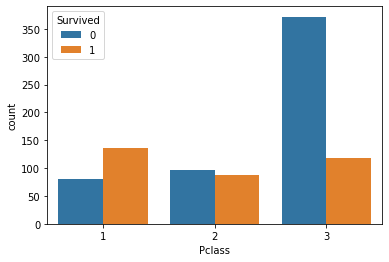

In [17]:
sns.countplot(x ='Pclass', hue = 'Survived',data = df)

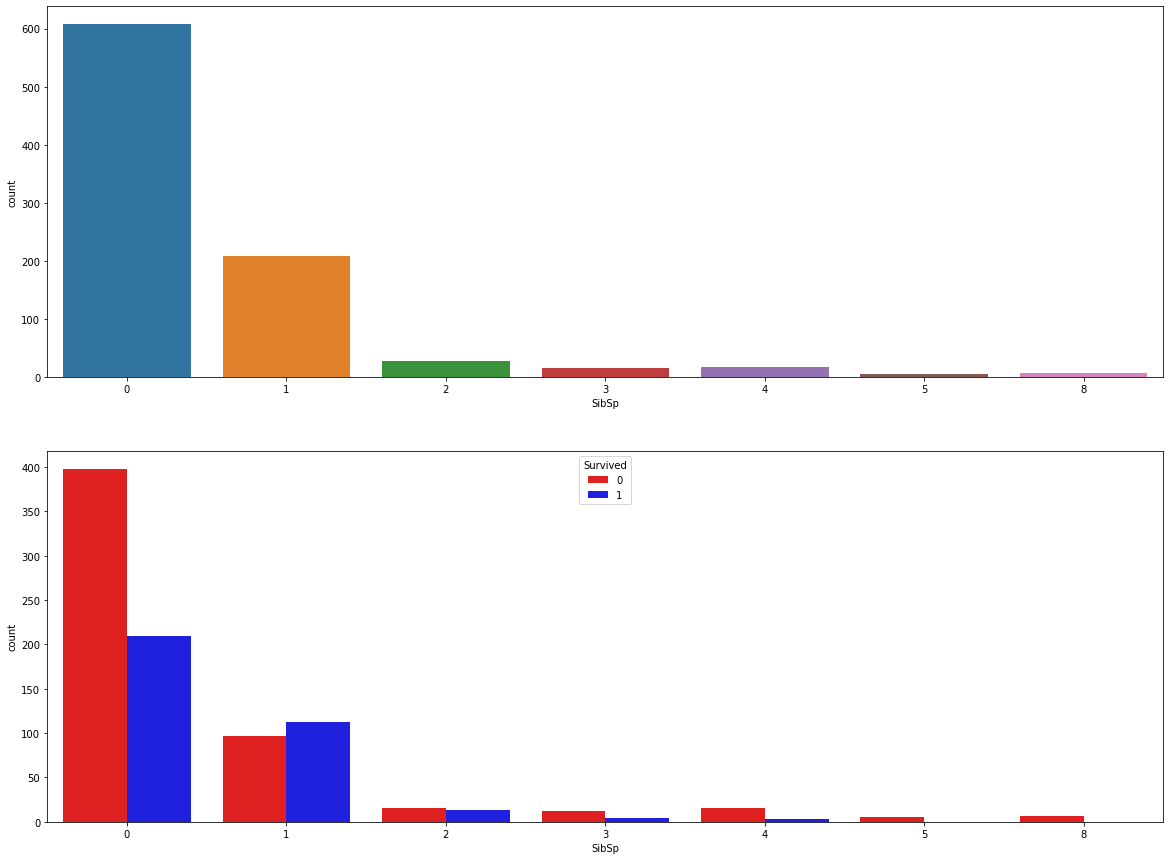

In [18]:
#denoting how many survived having siblings or spouse
plt.figure(figsize = [20,15])
plt.subplot(211)

#this graph denotes that there are many people not having any siblings/spouse
sns.countplot(x ='SibSp',data = df)
plt.subplot(212)

#this graph denotes that people not having Si/Sp have high death rate
sns.countplot(x ='SibSp',hue = 'Survived',data = df,palette=["red", "blue"])

# Data Cleaning and Feature Engineering

In [19]:
# lets explore which dataset is missing
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# lets drop cabin,embark,passengerid,name,ticket
column = ['PassengerId','Name','Ticket','Cabin','Embarked']
df.drop(column,axis = 1, inplace = True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


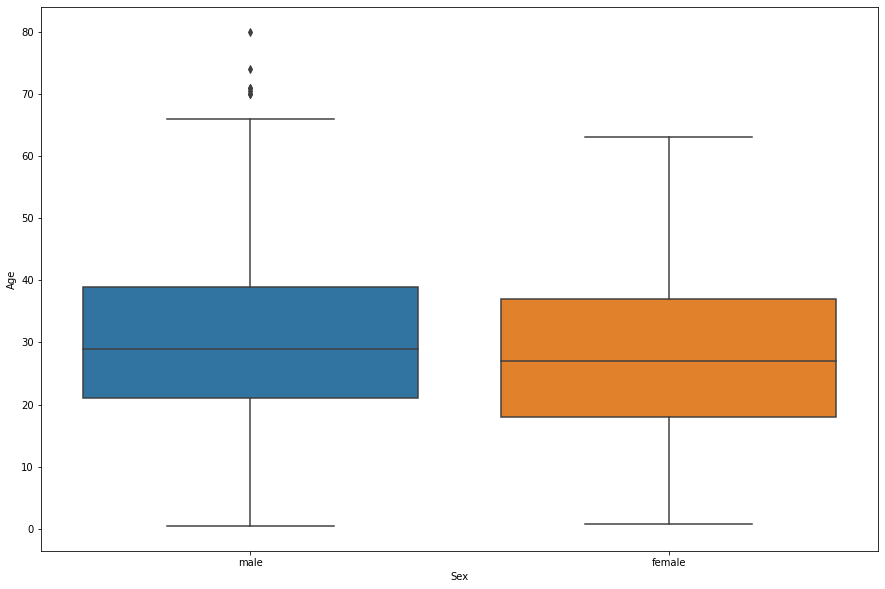

In [22]:
# lets get the average age for male and female
plt.figure(figsize=(15,10))
sns.boxplot(x='Sex',y='Age',data = df)

In [23]:
def fill_age(data):
    age = data[0]
    sex = data[1]
    
    if pd.isnull(age):
        if sex == 'male':
            return 29
        else:
            return 25
    else:
        return age

In [24]:
df['Age']= df[['Age','Sex']].apply(fill_age,axis=1)

In [25]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [26]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,25.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [27]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [28]:
male = pd.get_dummies(df['Sex'],drop_first =True)

In [29]:
male

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
# dropping the 'Sex' column
df.drop(['Sex'],axis = 1,inplace = True)

In [31]:
# adding male column into our dataset
df = pd.concat([df,male],axis=1)

In [32]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


In [33]:
X = df.drop('Survived',axis = 1).values
y =  df['Survived'].values

In [34]:
#test train split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33,random_state = 10)

##  Modeling

#### Logistic Regression

In [45]:
Logistic_Regression = LogisticRegression(random_state = 0)
Logistic_Regression.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [46]:
y_predict_test1 = Logistic_Regression.predict(X_test)
y_predict_test1

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [47]:
cm = confusion_matrix(y_test, y_predict_test1)
cm

array([[163,  28],
       [ 32,  72]], dtype=int64)

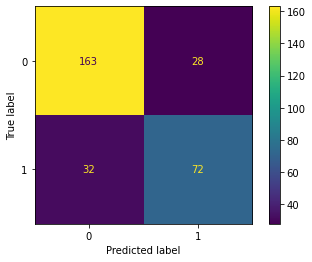

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [49]:
print(classification_report(y_test,y_predict_test1))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       191
           1       0.72      0.69      0.71       104

    accuracy                           0.80       295
   macro avg       0.78      0.77      0.78       295
weighted avg       0.80      0.80      0.80       295



#### Naive Bayes

In [40]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)
y_pred = NaiveBayes.predict(X_test)

In [50]:
y_predict_test2 = NaiveBayes.predict(X_test)
y_predict_test2

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [51]:
cm = confusion_matrix(y_test, y_predict_test2)
cm

array([[154,  37],
       [ 34,  70]], dtype=int64)

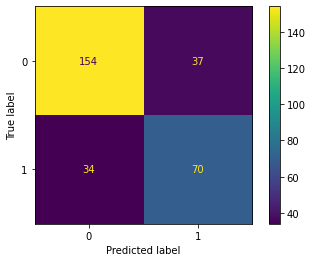

In [52]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [53]:
print(classification_report(y_test, y_predict_test2))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       191
           1       0.65      0.67      0.66       104

    accuracy                           0.76       295
   macro avg       0.74      0.74      0.74       295
weighted avg       0.76      0.76      0.76       295



**COMPARATIVE STUDY**

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [66]:
x = ["Logistics Regression", "Naive Bayes"]
y1 = [accuracy_score(y_test, y_predict_test1), accuracy_score(y_test, y_predict_test2)]
y2 = [precision_score(y_test, y_predict_test1), precision_score(y_test, y_predict_test2)]
y3 = [recall_score(y_test, y_predict_test1), recall_score(y_test, y_predict_test2)]
y4 = [f1_score(y_test, y_predict_test1), f1_score(y_test, y_predict_test2)]
y5 = [1 - accuracy_score(y_test, y_predict_test1), 1 - accuracy_score(y_test, y_predict_test2)]

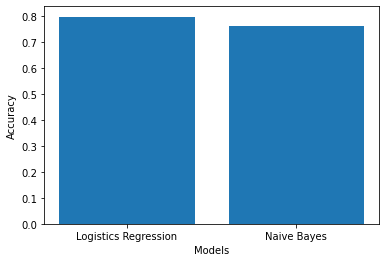

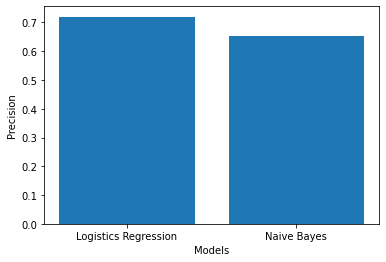

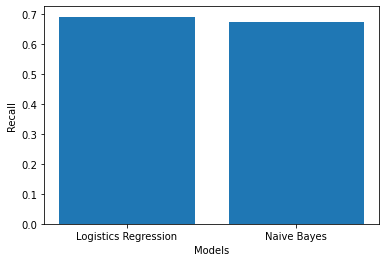

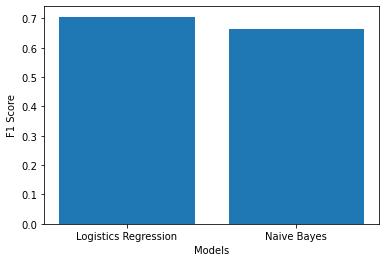

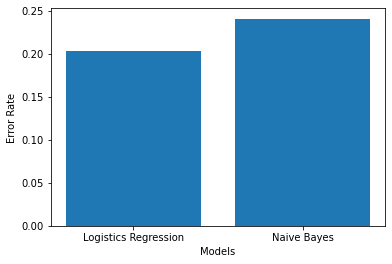

In [68]:
plt.bar(x, y1)
plt.xlabel('Models')
plt.ylabel("Accuracy")
plt.show()

plt.bar(x, y2)
plt.xlabel('Models')
plt.ylabel("Precision")
plt.show()

plt.bar(x, y3)
plt.xlabel('Models')
plt.ylabel("Recall")
plt.show()

plt.bar(x, y4)
plt.xlabel('Models')
plt.ylabel("F1 Score")
plt.show()

plt.bar(x, y5)
plt.xlabel('Models')
plt.ylabel("Error Rate")
plt.show()

**Here, the accuracy of both models as:**

1. Logistic Regression: 80%
2. Naive Bayes: 76%